**SECCIÓ 4: Aplicació d’un mètode de Petrov–Galerkin al flux periòdic bidimensional confinat entre dues parets en moviment**  
**Problema 4.1: Equacions de Navier-Stokes Fourier-Txebitxev**

En aquest repositori es presenta la simulació emprada per a l’equació de Burger's, **Problema 4.1**, que correspon a la **Secció 4** del treball.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import importlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines
import utils
import matrius
import terme_no_lineal
import funcions_de_dibuix
import terme_forces
import Integrador_numeric

def reload_modules():
    importlib.reload(utils)
    importlib.reload(matrius)
    importlib.reload(terme_no_lineal)
    importlib.reload(funcions_de_dibuix)
    importlib.reload(terme_forces)
    importlib.reload(Integrador_numeric)

    # Re-import all names into global scope
    exec('from utils import *', globals())
    exec('from matrius import *', globals())
    exec('from terme_no_lineal import *', globals())
    exec('from funcions_de_dibuix import *', globals())
    exec('from terme_forces import *', globals())
    exec('from Integrador_numeric import *', globals())

params = {
    'legend.fontsize': 15,
    'legend.loc': 'best',
    'figure.figsize': (14, 5),
    'lines.markerfacecolor': 'none',
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20, 
    'ytick.labelsize': 20, 
    'grid.alpha': 0.6,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman'],
    'text.latex.preamble': r'\usepackage{amsmath}'
}

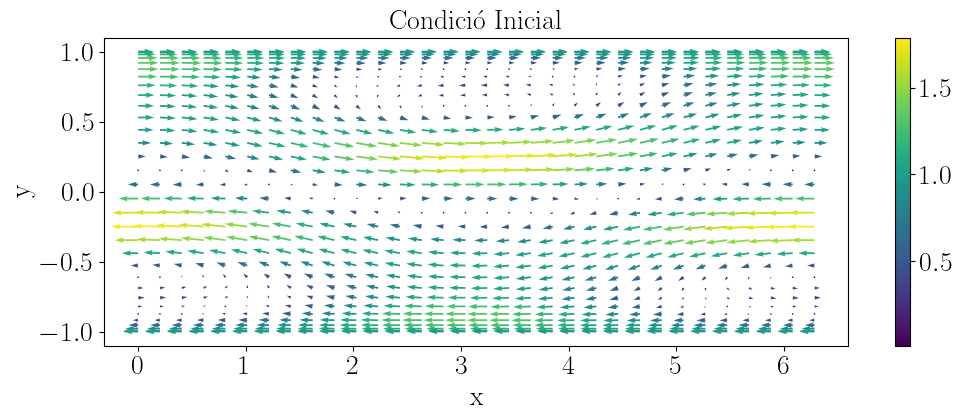

In [2]:
#PARAMETRES: 
Nx = 1 + 15 # Harmonics de Fourier (parell millor eficiencia)
Ny = 1 + 15 # Harmonics de Txebitxev  
Lx = 2 * np.pi # domini en x, domini en y es fixat a (-1,1)
Re = 1000 #Numero de Reynolds
T = 10 #Temps final
n_steps = 200 # numero de frames pel video. 

#CONDICIO INICIAL: 
alpha0 = np.array([[0 for _ in range(Nx)] for _ in range(Ny)], dtype = complex) #If not is interpreted as integers! 
alpha0[5, 0] = 1
alpha0[1,1] = 0 + 1j

#DIBUIX
reload_modules()
plot_velocity(alpha0, 32, 32)

In [3]:
alpha_solution_history_reshaped = Iniciar_programa(alpha0, Nx, Ny, Lx, Re, T, n_steps)
np.save(f'alpha_solution_history_reshaped_Nx_{Nx}_Ny_{Ny}_laminar_k_5', alpha_solution_history_reshaped)

Calculant matrius del terme lineal...
Matrius del terme lineal carregades.
Calculant matrius conversio alpha a u.
Matrius conversio alpha a u carregades.
Calculant matrius conversio alpha a u.
Matrius integracio alpha a u carregades.
Matriu derivacio Txebitxev carregada.
ODE System Call: t = 0.00000, Time = 0.00209 sec
ODE System Call: t = 0.00001, Time = 0.00000 sec
ODE System Call: t = 0.00014, Time = 0.00000 sec
ODE System Call: t = 0.00021, Time = 0.00000 sec
ODE System Call: t = 0.00056, Time = 0.00000 sec
ODE System Call: t = 0.00062, Time = 0.00000 sec
ODE System Call: t = 0.00070, Time = 0.00000 sec
ODE System Call: t = 0.00070, Time = 0.00000 sec
ODE System Call: t = 0.00210, Time = 0.01649 sec
ODE System Call: t = 0.00279, Time = 0.00321 sec
ODE System Call: t = 0.00629, Time = 0.00239 sec
ODE System Call: t = 0.00691, Time = 0.00084 sec
ODE System Call: t = 0.00768, Time = 0.00000 sec
ODE System Call: t = 0.00768, Time = 0.00000 sec
ODE System Call: t = 0.01008, Time = 0.000

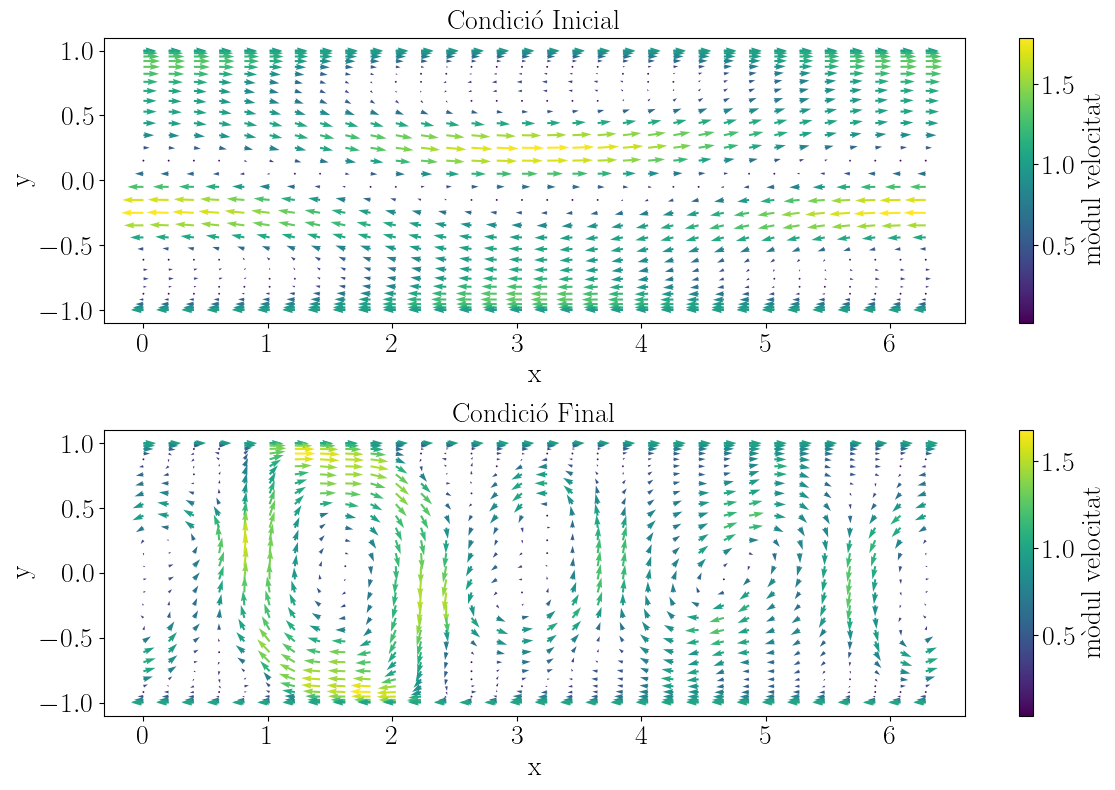

In [4]:
reload_modules()
plot_velocity_comparison(alpha0, alpha_solution_history_reshaped[-1])

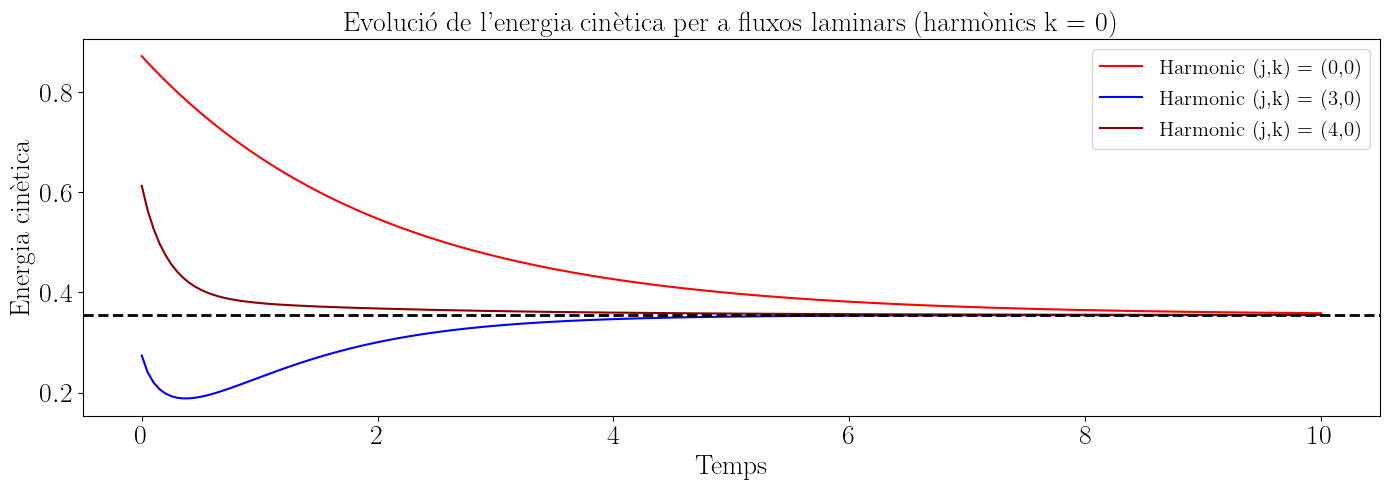

In [6]:
#Simulacio 
n_steps = 200
time_values = np.linspace(0, T, n_steps)
k_values_laminar = [0,3,4]

# Energia cinetica 
def compute_energy(alpha_solution_history):
    Nx_plot = 32
    Ny_plot = 32
    Lx = 2 * np.pi  
    _, _, u_list, v_list = reconstruct_velocity_field_efficient_equidistant(alpha_solution_history, Nx_plot, Ny_plot, Lx)
    return [np.sum(u**2 + v**2) / (Nx_plot * Ny_plot) for u, v in zip(u_list, v_list)]


colors = ['red', 'blue', 'darkred', 'red', 'red', 'red'] #cm.viridis(np.linspace(0, 1, len(k_values)))
for k, color in zip(k_values_laminar, colors):
    filename = f'Figura11/alpha_solution_history_reshaped_Nx_16_Ny_16_laminar_k_{k}.npy'
    alpha_data = np.load(filename)
    energy = compute_energy(alpha_data)
    plt.plot(time_values ,energy, label=f'Harmonic (j,k) = ({k},0)', color=color)

plt.xlabel('Temps')
plt.ylabel('Energia cinètica')
plt.title('Evolució de l\'energia cinètica per a fluxos laminars (harmònics k = 0)')
plt.axhline(y= 0.3548, color='black', linestyle='--', linewidth=2) #Energia corresponent a sol. particular u = (y,0)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


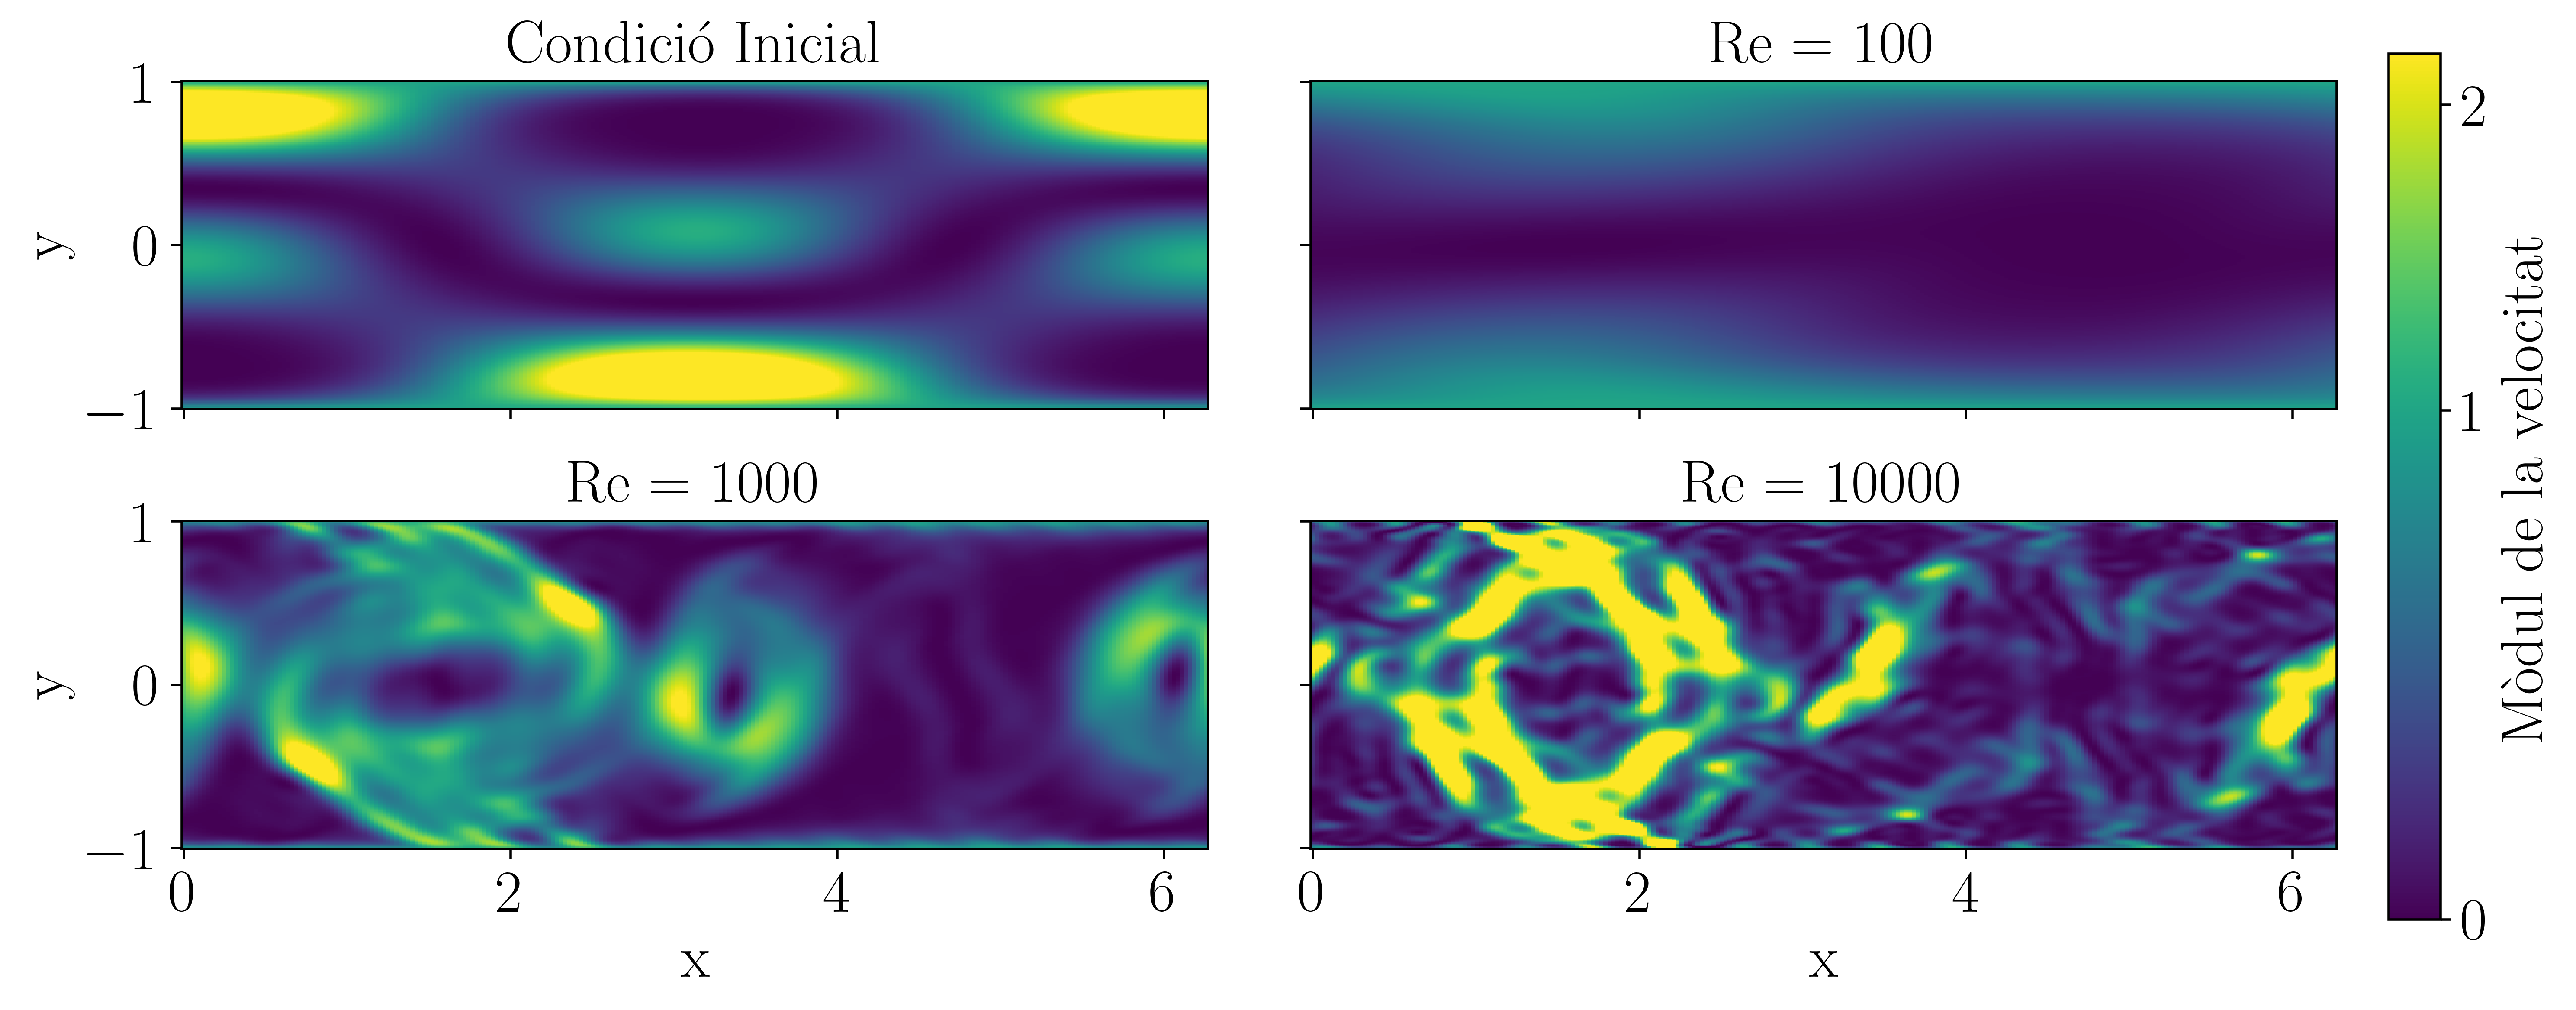

In [12]:
reload_modules()

# --------------------------
# Carregar dades + frame final 
# --------------------------
alpha_solution_history_turbulence_100 = np.load('Figura12/alpha_solution_history_reshaped_Nx_32_Ny_32_turbulence_100.npy')
alpha_solution_history_turbulence_1000 = np.load('Figura12/alpha_solution_history_reshaped_Nx_32_Ny_32_turbulence_1000.npy')
alpha_solution_history_turbulence_10000 = np.load('Figura12/alpha_solution_history_reshaped_Nx_32_Ny_32_turbulence_10000.npy')
alpha_list = [
    alpha_solution_history_turbulence_100[1], 
    alpha_solution_history_turbulence_100[-1], 
    alpha_solution_history_turbulence_1000[-15], 
    alpha_solution_history_turbulence_10000[-2]
]

# --------------------------
# Calcul velocitats
# --------------------------
speeds = []
Nx_plot = 256
Ny_plot = 256 
for alpha_sol in alpha_list: 
    X, Y, velocity_u, velocity_v = reconstruct_last_velocity_field_efficient_equidistant(alpha_sol , Nx_plot, Ny_plot, Lx)
    speeds.append(velocity_u**2 + velocity_v**2) 

# --------------------------
# DIBUIX
# --------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True, dpi = 500)
labels = ['Condició Inicial', 100, 1000, 10000]
for ax, speed, label in zip(axs.flat, speeds, labels):
    pcm = ax.pcolormesh(X, Y, speed, shading='auto', cmap='viridis', vmin=0, vmax=1.7)
    
    if label == 'Condició Inicial':
        ax.set_title(label)
    else:
        ax.set_title(f'Re = {label}')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')  
    ax.set_aspect('equal')

for ax in axs.flat:
    ax.label_outer()
    
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='vertical', label='Mòdul de la velocitat')
cbar.set_ticks([0, 1, 1.6])
cbar.set_ticklabels(['0', '1', '2'])
plt.subplots_adjust(left=0.07, right=0.9, top=0.95, bottom=0.07, hspace=-0.7, wspace=0.1)
plt.show()

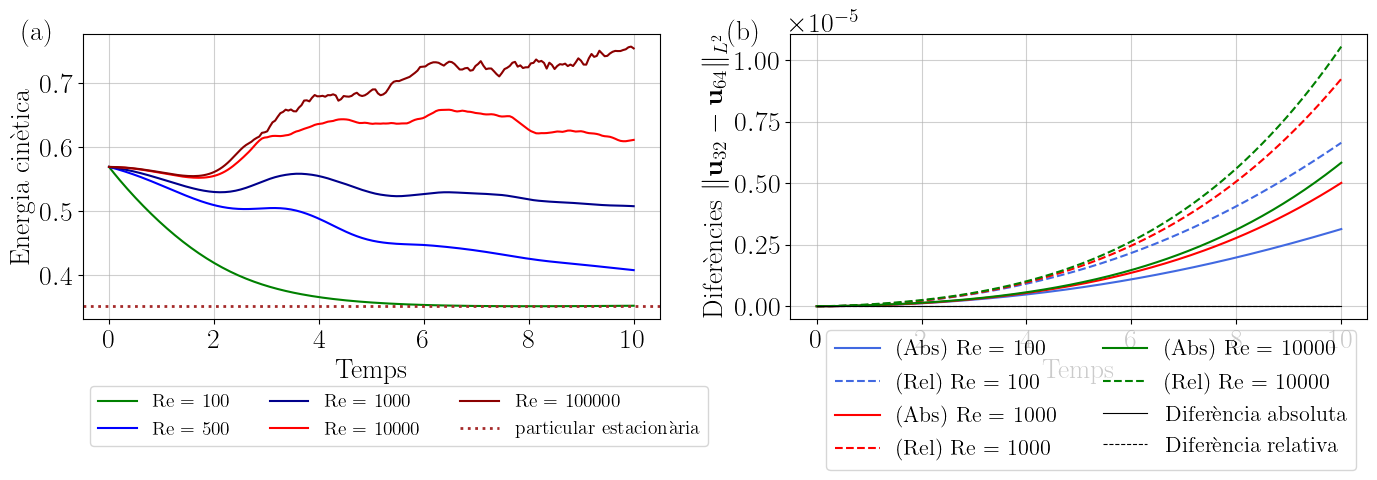

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
pas_temps = np.linspace(0, 10, 200)

# --------------------------
# DIBUIX (ESQUERRA)
# --------------------------
k_values_turbulent = [1, 2, 3, 4, 5]
Re_values = [100, 500, 1000, 10000, 100000]
colors_energy = ['green', 'blue', 'darkblue', 'red', 'darkred']
for k, color, Re in zip(k_values_turbulent, colors_energy, Re_values):
    filename = f'Figura13/alpha_solution_history_reshaped_Nx_32_Ny_32_turbulent_Re_{Re}.npy'
    alpha_data = np.load(filename)
    energy = compute_energy(alpha_data)
    ax1.plot(pas_temps, energy, label=f'Re = {Re}', color=color)


ax1.axhline(y=0.353, color='brown', linestyle=':', linewidth=2, label = 'particular estacionària')
ax1.set_xlabel('Temps')
ax1.set_ylabel('Energia cinètica')
ax1.grid(True)
ax1.legend(loc='upper right', ncol=3, fontsize=14, bbox_to_anchor=(1.1, -0.2), title_fontsize=16, frameon=True,)
ax1.text(-0.05, 1.05, '(a)', transform=ax1.transAxes, fontsize=20, va='top', ha='right')

# --------------------------
# DIBUIX (DRETA)
# --------------------------
colors_errors = {100: 'royalblue',1000: 'red',10000: 'green'}
errors_abs_dict = {}
errors_rel_dict = {}
Re_list = [100, 1000, 10000]
for Re in Re_list:
    Nx_plot = 64
    Ny_plot = 64
    alpha_32 = np.load(f'Figura13/alpha_solution_history_reshaped_Nx_32_Ny_32_3_Re_{Re}.npy')
    alpha_64 = np.load(f'Figura13/alpha_solution_history_reshaped_Nx_64_Ny_64_3_Re_{Re}.npy')

    X, Y, u_list_32, v_list_32 = reconstruct_velocity_field_efficient_equidistant(alpha_32, Nx_plot, Ny_plot, Lx)
    X, Y, u_list_64, v_list_64 = reconstruct_velocity_field_efficient_equidistant(alpha_64, Nx_plot, Ny_plot, Lx)

    error_abs = []
    error_rel = []

    for u32, v32, u64, v64 in zip(u_list_32, v_list_32, u_list_64, v_list_64):
        num = np.sum((u32 - u64)**2 + (v32 - v64)**2)
        den = np.sum(u64**2 + v64**2)
        error_abs.append(num / (Nx_plot * Ny_plot))
        error_rel.append(num / den)

    errors_abs_dict[Re] = error_abs
    errors_rel_dict[Re] = error_rel

for Re in Re_list:
    ax2.plot(pas_temps, errors_abs_dict[Re], label=f'(Abs) Re = {Re}', color=colors_errors[Re], linestyle='-')
    ax2.plot(pas_temps, errors_rel_dict[Re], label=f'(Rel) Re = {Re}', color=colors_errors[Re], linestyle='--')


ax2.plot(pas_temps, 1e-8 * np.ones_like(pas_temps), 'k-',  lw=0.8, label='Diferència absoluta')
ax2.plot(pas_temps, 1e-8 * np.ones_like(pas_temps), 'k--', lw=0.8, label='Diferència relativa')
ax2.set_xlabel("Temps")
ax2.set_ylabel(r"Diferències $\lVert \mathbf{u}_{32} - \mathbf{u}_{64} \rVert_{L^2}$")
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1, 0), ncol=2, loc='upper right',fontsize=16, frameon=True)
ax2.text(-0.05, 1.05, "(b)", transform=ax2.transAxes,fontsize=20, va="top", ha="right")

plt.grid(True)
plt.tight_layout(rect=[0, 0.02, 1, 1])
plt.show()